# Support Vector Machine

Support Vector Machines classify data by finding the hyperplane 

that maximizes the margin between the classes in the training data.

- In a two dimensional example with two classes,   we can think of a hyperplane as the widest straight 'band' that seperates the two classes.

# 17.1 Training a Linear Classifier

I need to train a model to classify observations.

In [5]:
from sklearn.svm import LinearSVC
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
import numpy as np

# Load data with only two classes and two features
iris = datasets.load_iris()
features = iris.data[:100, :2]
target = iris.target[:100]

# Standardize features
scaler = StandardScaler()
features_standardized = scaler.fit_transform(features)

# Create support vector classifier
svc = LinearSVC(C=1.0)

# Train model 
model = svc.fit(features_standardized, target)
model

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In the following code I plot the two classes on a two-dimensional space,

then draw the hyperplane: 

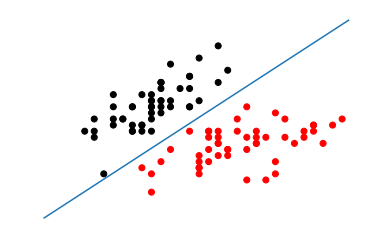

In [31]:
import matplotlib.pyplot as plt

# Plot data points and color using their class
color = ['black' if c == 0 else 'red' for c in target]
plt.scatter(features_standardized[:, 0], features_standardized[:, 1],
            c=color)

# Create the hyperplane
w = svc.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(-2.5, 2.5)
yy = a * xx - (svc.intercept_[0]) / w[1]

# Plot the hyperplane
plt.plot(xx, yy)
plt.axis('off')
plt.show()

In [32]:
# Create new observation
new_observation = [[-2, 3]]

# Predict class of new observation
svc.predict(new_observation)

array([0])

# 17.2 Handling Linearly Inseperable Classes Using Kernels

I want to train a SVC, but my classes are linearly inseperable.

In [40]:
from sklearn.svm import SVC
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
import numpy as np

# Set randomization seed
np.random.seed(0)

# Generate two features
features = np.random.randn(200, 2)

# Use a XOR gate to generate linearly inseperable classes
target_xor = np.logical_xor(features[:, 0] > 0, features[:, 1] > 0)
target = np.where(target_xor, 0, 1)

# Create a support vector machine with a radial basis function kernel
svc = SVC(kernel='rbf', random_state=0, gamma=1, C=1)

# Train the classifier
model = svc.fit(features, target)
model

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False)

In [42]:
# Plot Observations and decision boundary hyperplane
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier):
    cmap = ListedColormap(('red', 'blue'))
    xx1, xx2 = np.meshgrid(np.arange(-3, 3, 0.02), np.arange(-3, 3, 0.02))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.1, cmap=cmap)
    
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=cmap(idx),
                    marker='+', label=cl)
        
# Create support vector classifier with a linear kernel
svc_linear = SVC(kernel='linear', random_state=0, C=1)

# Train model
svc_linear.fit(features, target)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=0,
  shrinking=True, tol=0.001, verbose=False)

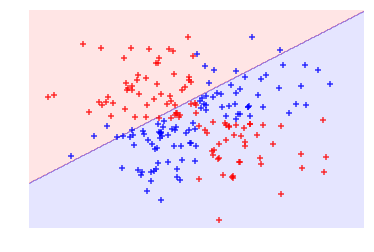

In [43]:
# Plot observations and hyperplane
plot_decision_regions(features, target, classifier=svc_linear)
plt.axis('off')
plt.show()

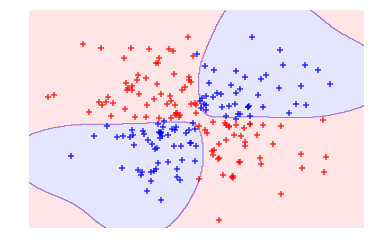

In [46]:
# Create a support vector machine with a radial basis function kernel
svc = SVC(kernel='rbf', random_state=0, gamma=1, C=1)

# Train the classifier
model = svc.fit(features, target)

# Plot observations and hyperplane
plot_decision_regions(features, target, classifier=svc)
plt.axis('off')
plt.show()

# 17.3 Creating Predicted Probabilities

I need to know the predicted class probabilities for an observation.

In [47]:
from sklearn.svm import SVC
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
import numpy as np

# Load data 
iris = datasets.load_iris()
features = iris.data
target = iris.target

# Standardize features
scaler = StandardScaler()
features_standardized = scaler.fit_transform(features)

# Create support vector classifier object
svc = SVC(kernel='linear', probability=True, random_state=0)

# Train classifier
model = svc.fit(features_standardized, target)

# Create new observation
new_observation = [[0.4, 0.4, 0.4, 0.4]]

# View predicted probabilities
model.predict_proba(new_observation)

array([[0.00593111, 0.96898012, 0.02508877]])

# 17.4 Identifying Support Vector

I need to identify which observations are the support vectors of the decision hyperplane.

In [52]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn import datasets
import numpy as np

# Load data with only two classes
iris = datasets.load_iris()
features = iris.data[:100, :]
target = iris.target[:100]

# Standardize features
scaler = StandardScaler()
features_standardized = scaler.fit_transform(features)

# Create support vector clssifier object
svc = SVC(kernel='linear', random_state=0)

# Train classifier 
model = svc.fit(features_standardized, target)

# View support vectors
model.support_vectors_

array([[-0.5810659 ,  0.42196824, -0.80497402, -0.50860702],
       [-1.52079513, -1.67737625, -1.08231219, -0.86427627],
       [-0.89430898, -1.4674418 ,  0.30437864,  0.38056609],
       [-0.5810659 , -1.25750735,  0.09637501,  0.55840072]])

We can view the indices of the support vectors using support_:

In [53]:
model.support_

array([23, 41, 57, 98], dtype=int32)

We can use n_support_ to find the number of support vectors belonging to each class:

In [54]:
model.n_support_

array([2, 2], dtype=int32)

# 17.5 Handling Imbalanced Classes

In [57]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn import datasets
import numpy as np

# Load data with only two classes
iris = datasets.load_iris()
features = iris.data[:100, :]
target = iris.target[:100]

# Make class highly imbalanced by removing first 40 observations
features = features[40:, :]
target = target[40:]

# Create target vector indicating if class 0, otherwise 1
target = np.where((target==0), 0, 1)

# Standardize features
scaler = StandardScaler()
features_standardized = scaler.fit_transform(features)

# Create support vector classifier
svc = SVC(kernel='linear', class_weight='balanced', 
          C=1.0, random_state=0)

# Train classifier 
model = svc.fit(features_standardized, target)
model

SVC(C=1.0, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=0,
  shrinking=True, tol=0.001, verbose=False)